# What are the skill trends required to become a Data Analyst in Indonesia?

#### Step:
1. Accumulate skill counts monthly
2. Analyze based on percentage of total jobs
3. Visualization the monthly skill demand

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Group the Skills by Month

In [3]:
# Filter Data Analyst Jobs in Indonesia
df_DA_INA = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Indonesia')].copy() 

# Create job_posted_month_num Column from extracted month in job_posted_date
df_DA_INA['job_posted_month_num'] = df_DA_INA['job_posted_date'].dt.month 

# Explode or Flatten Skills Column to Rows for each Skill
df_DA_INA_exploded = df_DA_INA.explode('job_skills')

In [4]:
# Pivot Table to show the number of job postings for each skill by month 
df_DA_INA_pivot = df_DA_INA_exploded.pivot_table(index='job_posted_month_num', columns='job_skills', aggfunc='size', fill_value=0) 

df_DA_INA_pivot

job_skills,airflow,aws,azure,bash,bigquery,cognos,databricks,docker,excel,flask,...,spark,spreadsheet,spss,sql,sql server,ssis,tableau,unix,wire,word
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,2,0,0,0,1,0,...,0,0,1,6,0,0,4,0,0,0
2,1,1,1,0,1,0,0,0,2,1,...,0,0,1,8,2,0,5,0,0,0
3,0,1,0,0,0,0,0,0,2,0,...,0,0,1,6,0,1,2,0,0,0
4,0,0,0,0,0,0,0,0,3,0,...,2,0,0,5,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,1,0,...,1,0,2,8,1,0,4,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,2,0,0,0
7,0,1,0,0,0,0,0,0,4,0,...,0,1,0,5,1,0,1,0,0,0
8,1,0,0,0,5,0,0,0,0,0,...,0,0,0,3,1,0,3,1,0,0
9,0,3,1,1,2,0,0,0,6,0,...,0,1,1,7,0,0,2,0,0,1


In [5]:
# Add Total Row to Pivot Table
df_DA_INA_pivot.loc['Total'] = df_DA_INA_pivot.sum() 
# Sort Columns by Total Row Values 
df_DA_INA_pivot = df_DA_INA_pivot[df_DA_INA_pivot.loc['Total'].sort_values(ascending=False).index]  
# Drop Total Row from Pivot Table
df_DA_INA_pivot = df_DA_INA_pivot.drop('Total') 

df_DA_INA_pivot


job_skills,sql,python,excel,tableau,r,power bi,sas,bigquery,spss,mysql,...,outlook,numpy,sap,react,pyspark,plotly,seaborn,ssis,unix,wire
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,6,4,1,4,1,2,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8,5,2,5,4,5,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6,6,2,2,3,1,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,4,3,0,3,3,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
5,8,7,1,4,3,2,0,0,2,1,...,0,1,0,0,0,0,0,0,0,0
6,2,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,3,4,1,2,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3,7,0,3,3,1,0,5,0,2,...,0,0,0,0,0,0,0,0,1,0
9,7,5,6,2,2,2,4,2,1,1,...,0,0,0,0,0,0,0,0,0,0


## Plot the Monthly Skill Counts

<Axes: xlabel='job_posted_month_num'>

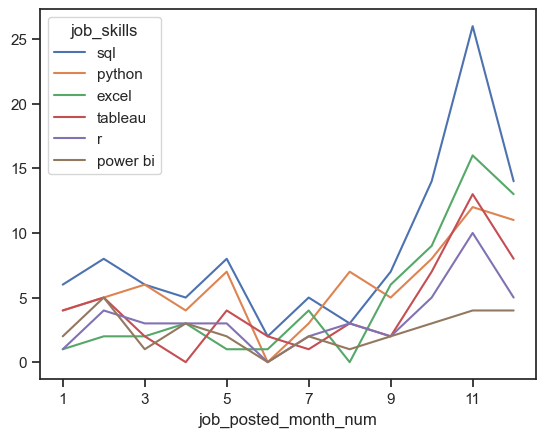

In [10]:
df_DA_INA_pivot.iloc[:, :6].plot(kind='line')

## Calculate Percentage of Total Jobs

In [11]:
DA_totals = df_DA_INA.groupby('job_posted_month_num').size() # Number of Job Postings by Month 

DA_totals

job_posted_month_num
1     11
2      8
3      8
4      7
5     11
6      5
7      8
8     10
9     13
10    28
11    41
12    28
dtype: int64

In [12]:
# Convert Job Postings to Percentage of Total Job Postings by Month 
df_DA_INA_percent = df_DA_INA_pivot.div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_INA_percent = df_DA_INA_percent.reset_index()
df_DA_INA_percent['job_posted_month'] = df_DA_INA_percent['job_posted_month_num'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_INA_percent = df_DA_INA_percent.set_index('job_posted_month')
df_DA_INA_percent = df_DA_INA_percent.drop(columns='job_posted_month_num')

df_DA_INA_percent 

job_skills,sql,python,excel,tableau,r,power bi,sas,bigquery,spss,mysql,...,outlook,numpy,sap,react,pyspark,plotly,seaborn,ssis,unix,wire
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.545455,36.363636,9.090909,36.363636,9.090909,18.181818,0.000000,18.181818,9.090909,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Feb,100.000000,62.500000,25.000000,62.500000,50.000000,62.500000,0.000000,12.500000,12.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Mar,75.000000,75.000000,25.000000,25.000000,37.500000,12.500000,25.000000,0.000000,12.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.5,0.0,0.000000
Apr,71.428571,57.142857,42.857143,0.000000,42.857143,42.857143,0.000000,0.000000,0.000000,28.571429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
May,72.727273,63.636364,9.090909,36.363636,27.272727,18.181818,0.000000,0.000000,18.181818,9.090909,...,0.000000,9.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Jun,40.000000,0.000000,20.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Jul,62.500000,37.500000,50.000000,12.500000,25.000000,25.000000,25.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
Aug,30.000000,70.000000,0.000000,30.000000,30.000000,10.000000,0.000000,50.000000,0.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,10.0,0.000000
Sep,53.846154,38.461538,46.153846,15.384615,15.384615,15.384615,30.769231,15.384615,7.692308,7.692308,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


## Plot Monthly Skill Demand

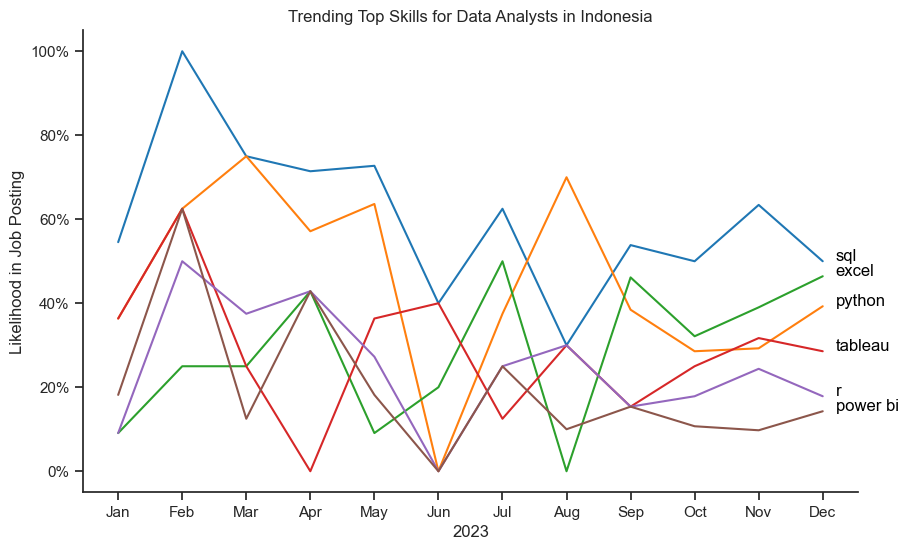

In [13]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_INA_percent.iloc[:, :6]
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_plot,
    dashes=False,
    palette='tab10'
)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Indonesia')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 6 skills using plt.text()
for i in range(6):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

    
plt.show()
